# Lendo e visualizando imagens

## Objetivo

O objetivo deste notebook é demonstrar como carregar, visualizar e manipular imagens para deixá-las prontas para o processamento.

Exemplificaremos as operações usando as duas bibliotecas mas comuns:

- Matplotlib
- PIL

## A biblioteca PIL

A biblioteca PIL, ou Python Image Processing traz para o Python a capacidade de processar imagens. A biblioteca suporta vários formatos de arquivo e poderosas ferramentas de processamento de imagem.

Alguns dos usos da biblioteca são Arquivamento, fazendo processamento em lote de imagens, Exibição, suportando várias interfaces (GUIs) e Processamento, como redimensionamento, rotação, histograma, dentre outras.

### Importando a biblioteca PIL


In [38]:
import numpy as np
from IPython.display import display
from PIL import Image

### Carregando uma imagem

In [39]:
img = Image.open('../figures/versicolor.jpg')

In [40]:
type(img)
img.size, img.bits, img.format, img.mode

((400, 400), 8, 'JPEG', 'RGB')

### Mostrando uma imagem PIL

No jupyter-notebook, chamar o objeto que contém a imagem faz com que ela seja mostrada.

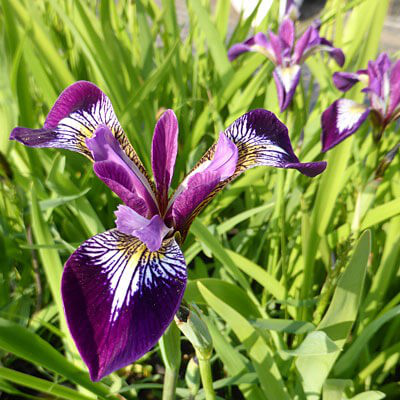

In [41]:
img

Ou também é possível usar o método display da classe IPython.display.

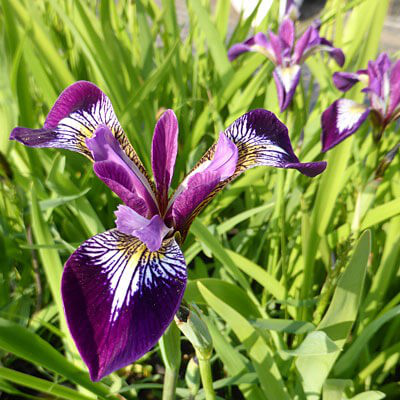

In [42]:
display(img)

### Dividindo os canais da imagem

Como a imagem anterior é colorida, ela contém os três canais (RGB - red, gree, blue). Com o método split é possível dividir os canais da imagens e visualizar cada um deles separadamente.

In [43]:
r,g,b = img.split()

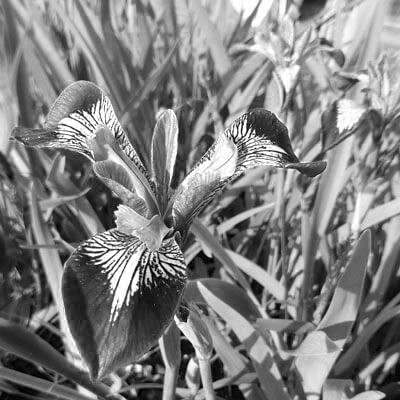

In [44]:
r

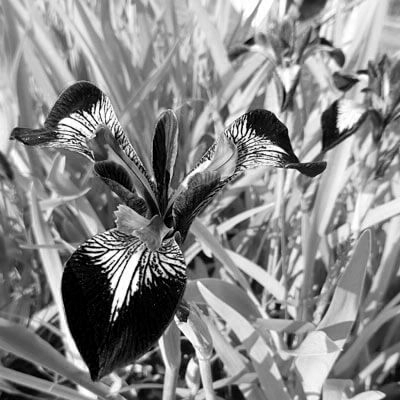

In [45]:
g

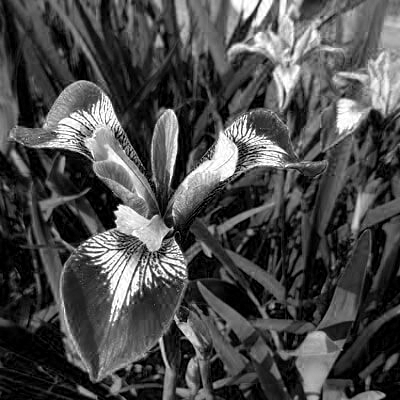

In [46]:
b

### Carregando a imagem com diferentes canais

Também é possível carregar a imagem somente com um canal, em escala de cinza, usando o método convert com o parâmetro L.


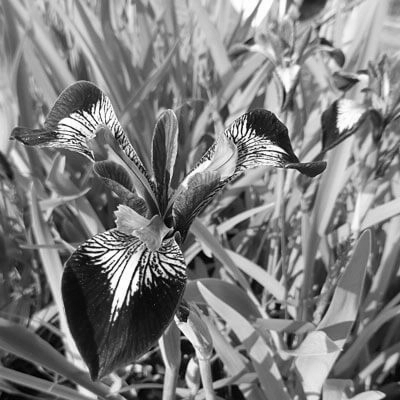

In [47]:
img1 = Image.open('../figures/versicolor.jpg').convert('L')
img1

### Salvando uma imagem em disco em formato diferente

Para salvar uma imagem em disco, usamos o método save passando como parâmetro o caminho para salvar a imagem. Caso seja necessário alterar o formato da imagem, é possível passar como parâmetro o formato desejado.


In [48]:
img1.save('../figures/versicolor_BW.png','png')

### Transformando uma imagem em um array numpy

Para transformar a imagem em um array numpy, usamos o método array da classe numpy.

In [49]:
numpy_img = np.array(img)

### Mostrando as dimensões da imagem

Neste caso, a imagem possui 3 dimensões: a primeira é altura da imagem, a segundo é a largura da imagem e a terceira contém os canais R, G, B da imagem.

In [50]:
numpy_img.shape

(400, 400, 3)

No caso acima, a imagem está representada no formato *channels last*. Existem duas formas principais de representar a imagem no array:

- *channels first*
- *channels last*

Dependendo das bibliotecas a serem usadas, às vezes precisamos trocar as dimensões e passar a informação de canais para a primeira posição. Esta configuração é conhecida como *channels-first*.

In [51]:
numpy_img.transpose(2,0,1).shape

(3, 400, 400)

## A biblioteca Matplotlib

O Matplotlib é uma biblioteca para plotagem 2D. Com ela é possível plotar pontos, funções, estatísticas e imagens.

### Importando a biblioteca

Nota: quando o Matplotlib é usando dentro do Jupyter-Notebook é necessário o uso do comando %matplotlib inline para que os gráficos sejam mostrados.

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

### Mostrando uma imagem no Matplotlib

Note que para mostrar uma imagem com a biblioteca Matplotlib, esta já precisa estar carregada em um objeto.

A biblioteca Matplotlib consegue mostrar tanto imagens coloridas no formato PIL quando arrays NumPy no formato channels last.

### Mostrando uma imagem no formato array numpy:

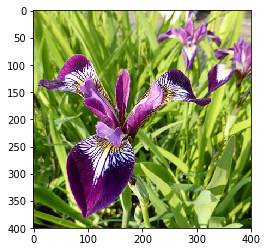

In [53]:
plt.imshow(numpy_img)

### Mostrando uma imagem no formato PIL:

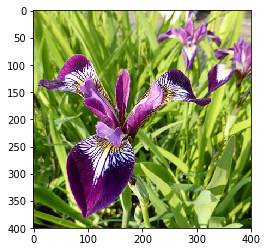

In [54]:
plt.imshow(img)

### Manipulando o plot

Por ser uma biblioteca de plotagem, é possível manipular várias informações do plot, como grid, título, label dos eixos, tamanho da figura, dentre outras.


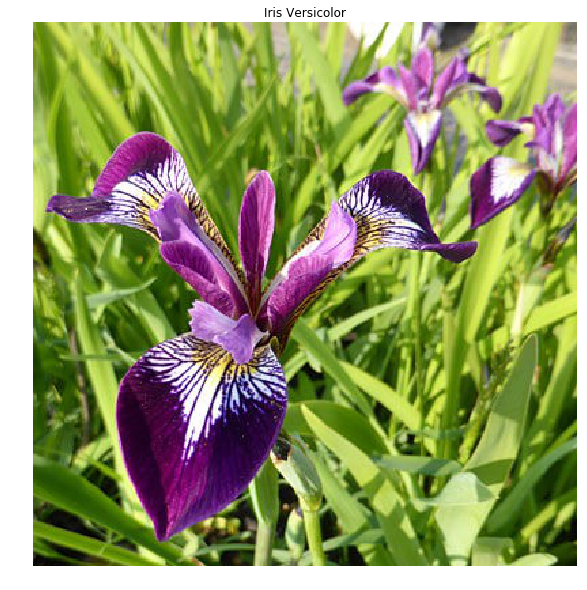

In [55]:
plt.figure(figsize=(15, 10))
plt.title("Iris Versicolor")
plt.imshow(numpy_img)
plt.axis('off')
plt.show()

### Mostrando imagens monocromáticas (1 canal) no Matplotlib

In [58]:
img2 = Image.open('../figures/versicolor_BW.png')
numpy_img2 = np.array(img2)
numpy_img2.shape

(400, 400)

Por padrão, o Matplotlib utiliza uma tabela de cor falsa (pseudo cor) quando visualiza uma imagem de um único canal. A função colorbar() mostra a tabela de cor utilizada:

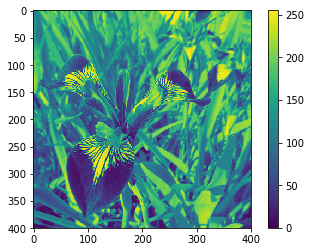

In [59]:
plt.imshow(numpy_img2)
plt.colorbar();

Para visualizar a imagem en tons de cinza, deve-se informar a tabela gray, no parâmetro cmap do imshow.

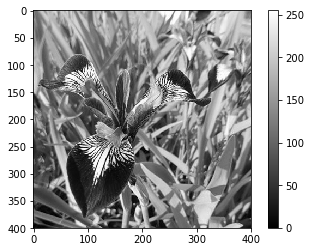

In [60]:
plt.imshow(numpy_img2, cmap='gray')
plt.colorbar()

### Leitura de imagens com Matplotlib

Existe um cuidado especial quando utilizar o Matplotlib para ler imagens. Dependendo do formato do arquivo da imagem, o arrary NumPy lido pode ser normalizado.

In [91]:
import matplotlib.image as mpimg
f = mpimg.imread('../figures/versicolor_BW.png')
f.shape, f.dtype, f.min(), f.max()

((400, 400), dtype('float32'), 0.0, 1.0)

In [92]:
import matplotlib.image as mpimg
f = mpimg.imread('../figures/versicolor.jpg')
f.shape, f.dtype, f.min(), f.max()

((400, 400, 3), dtype('uint8'), 0, 255)